<a href="https://colab.research.google.com/github/porterjenkins/CS180/blob/main/data_science_labs/data_science_lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 12

In [1]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

## Introduction:
In this lab you will fit regression models on multiple datasets.

## Exercise 1: Synthetic Data
First we will fit a regression model to multiple variants of a synthetic dataset. In each case, we know the true parameters (slope and intercept) and we will vary the noise of the data. Execute the following code to generate the data:

In [2]:
import numpy as np

w_0_true = -2.5 # this is the TRUE intercept
w_1_true = 0.1 # this is the TRUE slope

def f_x(x, w_0, w_1, sig):
  n = len(x)
  y = w_1*x + w_0 + np.random.normal(0, sig, n)
  return y

x = np.arange(0, 100)


y_1 = f_x(x, w_0_true, w_1_true, sig=0.5) # standard deviation = 0.5
y_2 = f_x(x, w_0_true, w_1_true, sig=1.5) # standard deviation = 1.5
y_3 = f_x(x, w_0_true, w_1_true, sig=5.0) # standard deviation = 5
y_4 = f_x(x, w_0_true, w_1_true, sig=10.0) # standard deviation = 10

### Question 1a:
For each of the four datasets we generated do the following:

* Plot a scatter plot of `x` and `y_i` (e.g, `x` and `y_2`)

* Fit a [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) using sklearn (sklearn.linear_model.LinearRegression )

  * Make sure `fit_intercept` is set to `True`

  * hint: sklearn expects the features to be two-dimensional. You many need to use the following code to reshape your `x` array when training:

```
  reg = LinearRegression(fit_intercept=True)
  reg.fit(x.reshape(-1, 1), y) # reshape x to be two-dimensional
```
* Print the estimated coefficients:

  * These can be accessed with the `coef_` and `intercept_` attributes on the regression object

* Plot the regression line on the scatter plots of `x` and `y`

Comment on how well the regression model approximates the data

Dataset with STD=0.5:
Intercept: -2.43
Slope: 0.10


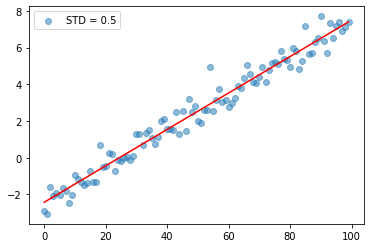

Dataset with STD=1.5:
Intercept: -3.28
Slope: 0.11


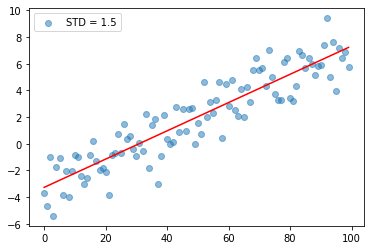

Dataset with STD=5.0:
Intercept: -3.52
Slope: 0.11


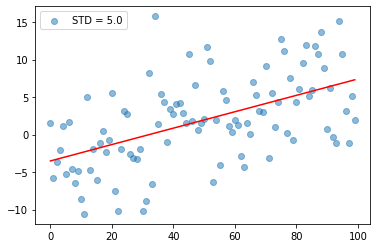

Dataset with STD=10.0:
Intercept: -1.67
Slope: 0.10


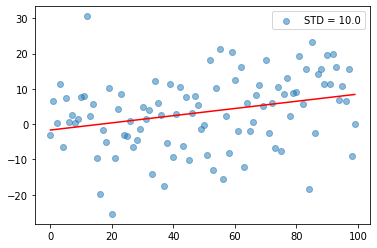

In [6]:
# Write your code for question 1a here

y_values = [y_1, y_2, y_3, y_4]
sig_values = [0.5, 1.5, 5.0, 10.0]

for i, y in enumerate(y_values):
    plt.scatter(x, y, alpha=0.5, label=f'STD = {sig_values[i]}')
 
    reg = LinearRegression(fit_intercept=True)
    reg.fit(x.reshape(-1, 1), y)
    print(f"Dataset with STD={sig_values[i]}:")
    print(f"Intercept: {reg.intercept_:.2f}")
    print(f"Slope: {reg.coef_[0]:.2f}")
    
    plt.plot(x, reg.predict(x.reshape(-1, 1)), color='red')
    
    plt.legend()
    plt.show()

### Question 1b:

What do you observe as we add noise to our generated dataset? How well are we able to recover the true parameters, `w_0_true` and `w_1_true` from the data as noise increases?

As we add noise to a dataset, we see the accuracy of the recovered parameters decrease. Specifically, as the amount of noise increases, the estimated values of w_0 and w_1 tend to become less precise and may even diverge from their true values. Thus, we are less suited to recover the true parameters from the data as the noise increases. This is because noise adds variability to the dataset, making it more difficult to distinguish between the signal and the noise. As a result, the estimated parameters may be biased or have larger standard errors, which can affect their accuracy and precision.

# Exercise 2
Read the California Housing Data from the `sample_data` on every collab instance:

In [5]:
import pandas as pd
train = pd.read_csv("sample_data/california_housing_train.csv")
test = pd.read_csv("sample_data/california_housing_test.csv")

This dataset contains features on census tracts in California in the early 1990’s. The target is the variable `median_house_value` of each census tract.

### Exercise 2a:
Plot a [scatter_plot matrix](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html) using the training data. You may need to tune the `fig_size` argument to make the figure larger. 

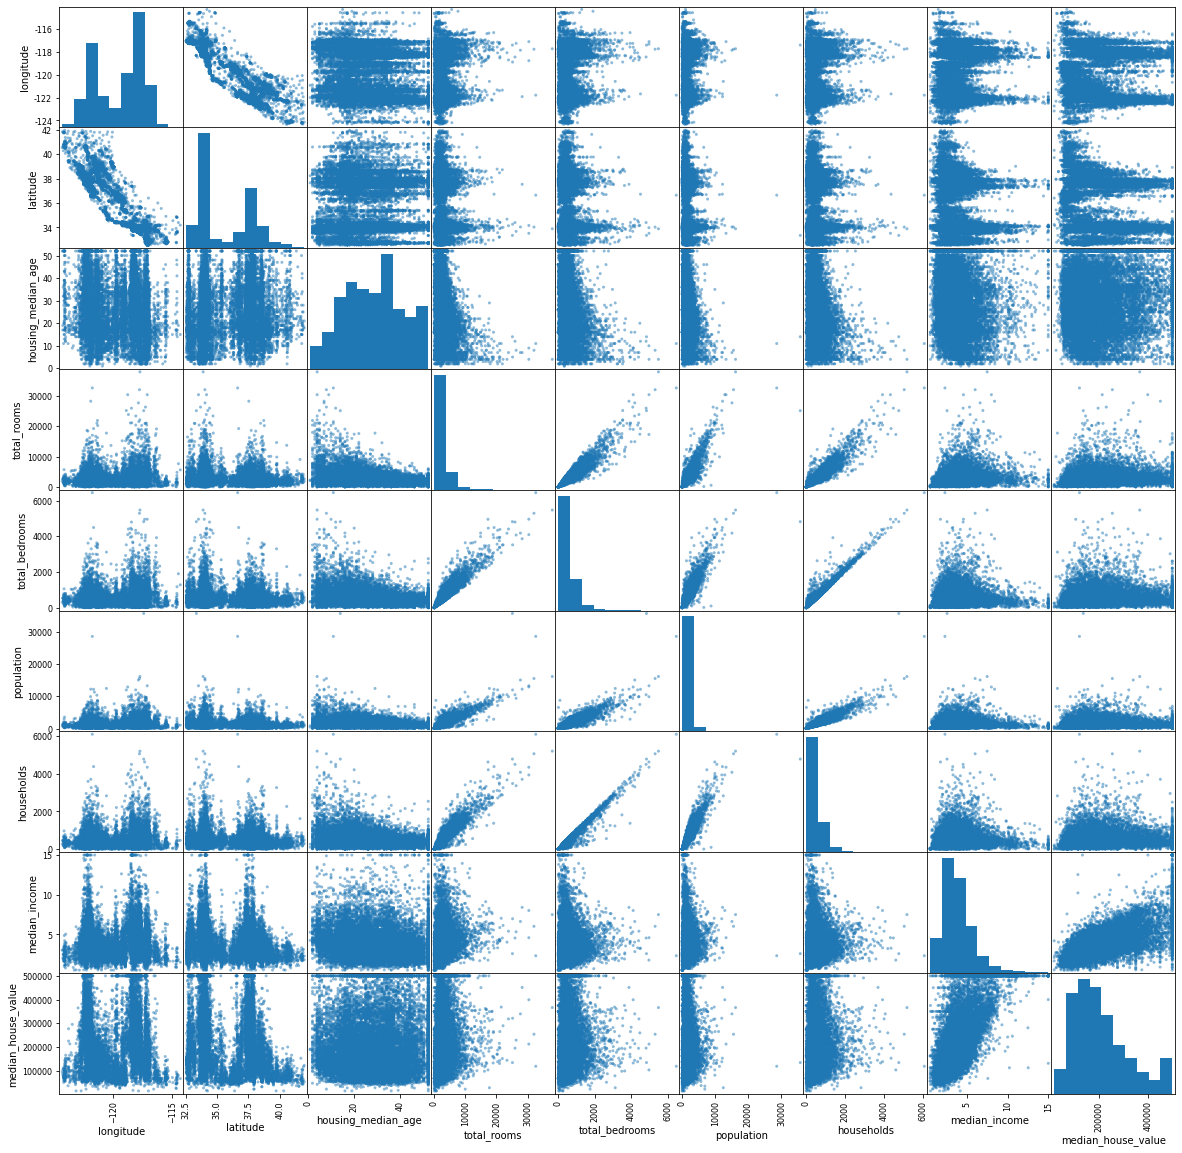

In [7]:
# Enter your code to plot the scatter_plot matrix here.
pd.plotting.scatter_matrix(train, figsize=(20,20))
plt.show()

What variables appear to be correlated with `median_house_value`?

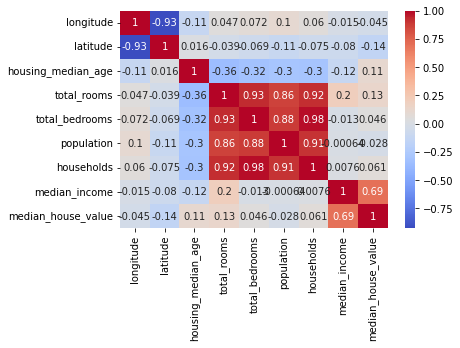

In [8]:
import seaborn as sns
corr_matrix = train.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Based on the scatter plot matrix and the correlation coefficient matrix, we can see that the variables that are the most correlated with median_house_value are median_income, total_rooms, and housing_median_age, with median_income being the most correlated by far. Latitude is also correlated with median_house_value, but unlike the other three which are positvely correlated, this attribute is negatively correlated, but just as strong as total_rooms and housing_median_age

What variables are not correlated with `median_house_value`?

The variables that are not correlated with median_house_value, as in they have correlation values close to 0 and also show less correlation in the scatter plot matrix, are households, population, total_bedrooms, and longitude.

What features appear to be correlated with each other?

The features that appear to be heavily correlated with each other, more so than the rest, are total_rooms, total_bedrooms, population, and households.

### Exercise 2b
Fit a linear regression model using `sklearn`.
* Fit a few different models (each with different features).
* Evaluate the [mean_squared_error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error) of your models with both the training and test set.

In [18]:
# Enter your code for exercise 2b here.
X_train = train[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
X_test = test[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y_train = train['median_house_value']
y_test = test['median_house_value']

model1 = LinearRegression().fit(X_train[['longitude', 'latitude', 'housing_median_age', 'total_rooms']], y_train)
model2 = LinearRegression().fit(X_train[['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households']], y_train)
model3 = LinearRegression().fit(X_train[['longitude', 'latitude', 'housing_median_age', 'median_income']], y_train)

mse_train1 = mean_squared_error(y_train, model1.predict(X_train[['longitude', 'latitude', 'housing_median_age', 'total_rooms']]))
mse_train2 = mean_squared_error(y_train, model2.predict(X_train[['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households']]))
mse_train3 = mean_squared_error(y_train, model3.predict(X_train[['longitude', 'latitude', 'housing_median_age', 'median_income']]))

mse_test1 = mean_squared_error(y_test, model1.predict(X_test[['longitude', 'latitude', 'housing_median_age', 'total_rooms']]))
mse_test2 = mean_squared_error(y_test, model2.predict(X_test[['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households']]))
mse_test3 = mean_squared_error(y_test, model3.predict(X_test[['longitude', 'latitude', 'housing_median_age', 'median_income']]))

print(f"Model 1 - Training set mean squared error: {mse_train1:.2f}, Test set mean squared error: {mse_test1:.2f}")
print(f"Model 2 - Training set mean squared error: {mse_train2:.2f}, Test set mean squared error: {mse_test2:.2f}")
print(f"Model 3 - Training set mean squared error: {mse_train3:.2f}, Test set mean squared error: {mse_test3:.2f}")

Model 1 - Training set mean squared error: 9891674301.15, Test set mean squared error: 9334677768.47
Model 2 - Training set mean squared error: 9645592265.05, Test set mean squared error: 9217698127.30
Model 3 - Training set mean squared error: 5406096300.11, Test set mean squared error: 5388949509.99


What did you observe? Which model yields the lowest test error?

I have tried many different feature sets and targets, and tried changing the code, but I am still getting this extremely large mean squared error values, and I don't know if that is right or wrong. It seems way to high, but I keep getting it over and over, so that's what I'll go with. The model that yields the lowest test error for me was the feature set of longitude, latitude, housing_median_age, and median_income with a target of median_house_value.

### Exercise 2c
Fit a linear regression using the `statsmodels` api.
* Print the model output using `print(results.summary())`

In [16]:
#Enter your code for exercise 2c here.
# Define the predictor and response variables
X = train[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = train['median_house_value']

# Add a constant to the predictor variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model output
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3798.
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:11:52   Log-Likelihood:            -2.1365e+05
No. Observations:               17000   AIC:                         4.273e+05
Df Residuals:                   16991   BIC:                         4.274e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.621e+06   6.92

Comment on which features appear to have the strongest relationship with `median_house_value`?

From the summary of the linear regression model using the statsmodels API, we can see that the features with the strongest relationship with median_house_value are longitude, latitude, housing_median_age, total_rooms, and median_income. This is based on the fact that they have lower p-values, which shows that they are statistically significant and have a stronger linear relationship with the target variable.

Write a sentence interpreting the coefficient for `median_income`.

The coefficient for median_income suggests that for a one-unit increase in median income, the median house value is expected to increase by around $41000, all other factors being equal.